# Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt
import scipy

In [2]:
fpath = r'C:\Users\Mei\Instacart Basket Analysis\02 Data'

In [3]:
df_merge_49 = pd.read_pickle(os.path.join(fpath,'Prepared data','merged_49.pkl'))

# 1. Histogram of 'order_hour_of_day'

In [4]:
df_merge_49.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30630852 entries, 0 to 30630851
Data columns (total 14 columns):
 #   Column             Dtype   
---  ------             -----   
 0   product_id         int64   
 1   department_id      int64   
 2   prices             float64 
 3   user_id            int64   
 4   order_number       int64   
 5   order_day_of_week  int64   
 6   order_hour_of_day  int64   
 7   loyalty_flag       object  
 8   gender             object  
 9   age                int64   
 10  n_dependants       int64   
 11  family_status      object  
 12  income             int64   
 13  _merge             category
dtypes: category(1), float64(1), int64(9), object(3)
memory usage: 3.2+ GB


<AxesSubplot:ylabel='Frequency'>

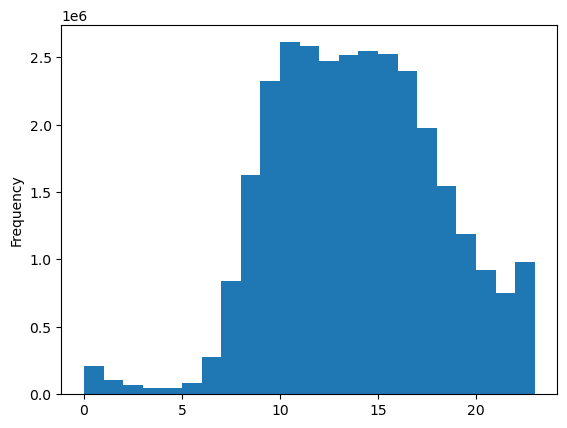

In [11]:
df_merge_49['order_hour_of_day'].plot.hist(bins = 24)# bins is the number of the bin you want to show

In [8]:
df_merge_49['order_hour_of_day'].value_counts()

10    2609974
11    2585983
14    2543495
15    2519668
13    2517357
12    2474178
16    2398449
9     2320527
17    1974003
8     1623753
18    1543950
19    1189805
20     921273
7      841440
21     752681
22     598946
23     378696
6      275023
0      206675
1      109287
5       83276
2       65190
4       49421
3       47802
Name: order_hour_of_day, dtype: int64

### Conclusion based on this Histogram: 
1) the orders of a day at 10 o'clock are the most - busiest hours

2) the orders at 3 o'clock are the least - least busy hours

3) the orders increase from 0'olock till 10 o'clock, then stays still very many till 16 o'clock, then dicreases

# 2. Bar chart for category of loyalty

<AxesSubplot:>

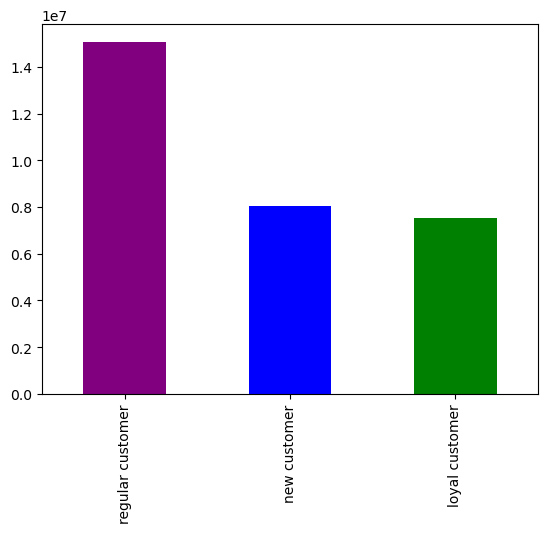

In [15]:
 df_merge_49['loyalty_flag'].value_counts().plot.bar(color =['purple','blue','green'])

### Output the figure

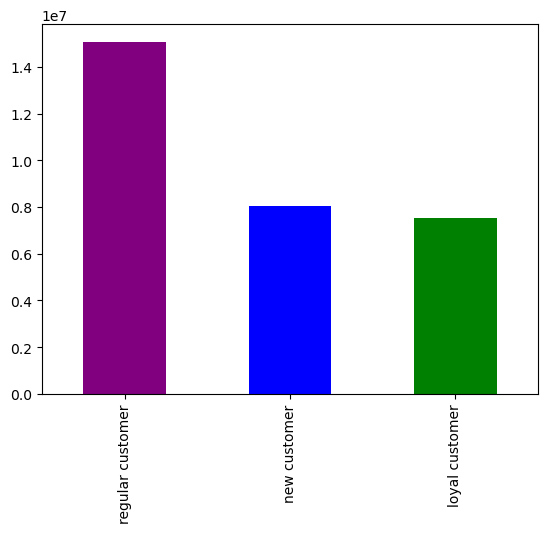

In [39]:
bar = df_merge_49['loyalty_flag'].value_counts().plot.bar(color =['purple','blue','green'])

In [42]:
bar.figure.savefig(os.path.join(fpath,'bar.png'))

# 3. Line chart 'prices' and 'order_hour_of_day'

## 3.1 Select a representative sample 70/30

In [16]:
np.random.seed(5)

In [17]:
dev = np.random.rand(len(df_merge_49)) <= 0.7

In [19]:
large = df_merge_49[dev]

In [20]:
small = df_merge_49[~dev]

In [21]:
large.shape

(21440177, 14)

In [22]:
small.shape

(9190675, 14)

In [23]:
df_merge_49.shape

(30630852, 14)

## 3.2 Check if the sample can be a representative for the population

<AxesSubplot:xlabel='order_hour_of_day', ylabel='prices'>

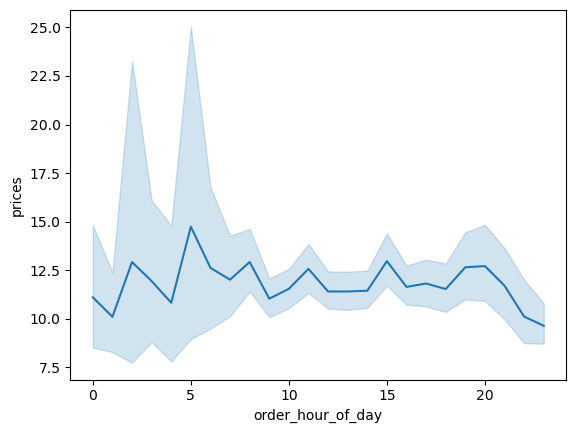

In [25]:
sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices')

<AxesSubplot:xlabel='order_hour_of_day', ylabel='prices'>

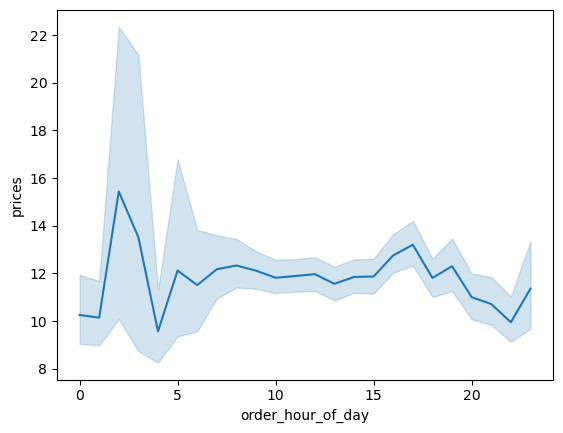

In [26]:
sns.lineplot(data = large, x ='order_hour_of_day',y = 'prices')

### The two line charts look similar, so the samll dataset can be taken as a representative of the whole population

# 4. Customer demographics

## 4.1 Line chart of age and family situation

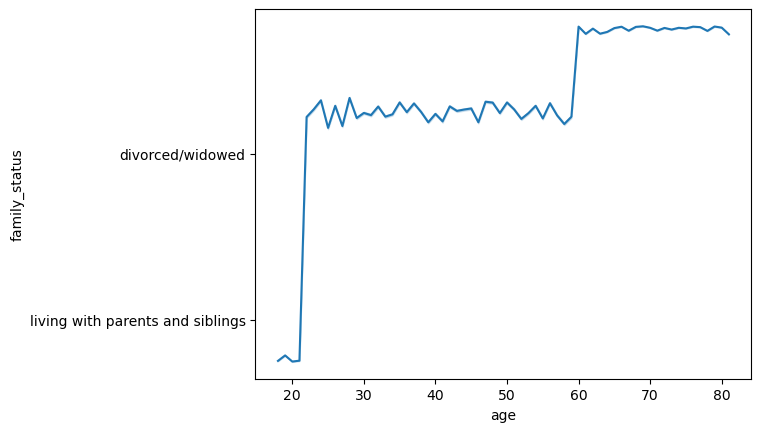

In [27]:
figure5_1 = sns.lineplot(data = small, x = 'age', y = 'family_status')

In [28]:
fpath_outp = r'C:\Users\Mei\Instacart Basket Analysis'

In [30]:
figure5_1.figure.savefig(os.path.join(fpath_outp,'04 Analysis','figure_age_familysta.png'))

## 4.2 Line chart of age and number of dependants

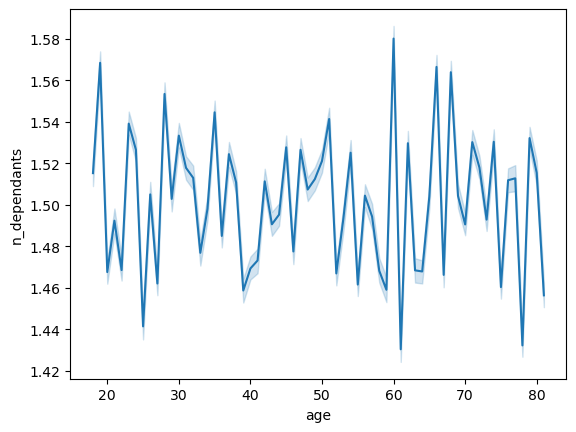

In [31]:
figure5_2 = sns.lineplot(data = small, x ='age', y = 'n_dependants')

In [32]:
figure5_2.figure.savefig(os.path.join(fpath_outp,'04 Analysis','figure_age_depend.png'))

In [33]:
small['n_dependants'].value_counts()

3    2303615
2    2298566
0    2295925
1    2292569
Name: n_dependants, dtype: int64

### Conclusions based on the analysis:  

1) From the line chart figure5_1, one can see that when the age is approaching 30 and more than 30, more divorces happen. 

2) From the line chart figure5_2, no obvious correlation between age and n_dependants (the number of dependants) is found

# 5. Scatterplot of age and income

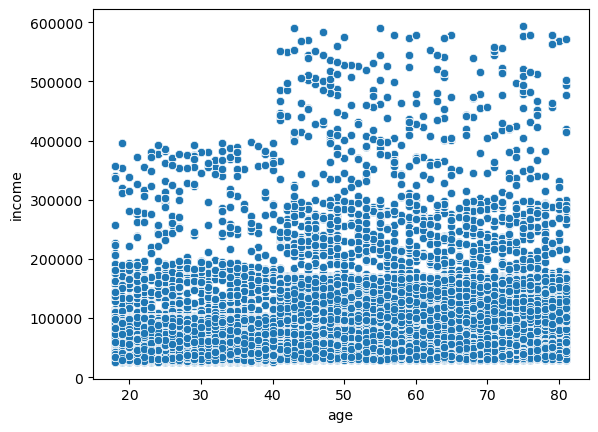

In [38]:
figure_scatter = sns.scatterplot(x = 'age', y ='income', data = small)

### Conclusions:
1) There is a bigger percentage of people whose ages are around 40 and oder than 40 years old having higher income (>20,000). 

2) There is a very small percentage of people whos sages are less than 40 years old having income ( 20,000 <income < 40,000), most of them have less than 20,000 dollars. 